# DataFrame 병합 예제

## 평점이 가장 높은 top 10 영화 찾기

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### movie 데이터 로드

In [58]:
columns = ['movie_id','title','genre']
df_movies = pd.read_csv('./data/movies.dat',delimiter='::',encoding='latin1',names=columns)
df_movies

C:\Users\gikpreet\AppData\Local\Temp\ipykernel_10836\3870311197.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies = pd.read_csv('./data/movies.dat',delimiter='::',encoding='latin1',names=columns)


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


### 제목과 개봉연도 분리

In [59]:
df_movies['year'] = [x.split('(')[1].rstrip(')') for x in df_movies['title']]
df_movies['title'] = [x.split('(')[0].strip() for x in df_movies['title']]
df_movies.head()

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


### rating 데이터 로드

In [60]:
columns = ['movie_id','rating','timestamp']
df_rating = pd.read_csv('./data/ratings.dat',delimiter='::',names=columns)
df_rating.head()

C:\Users\gikpreet\AppData\Local\Temp\ipykernel_10836\3735885920.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv('./data/ratings.dat',delimiter='::',names=columns)


,movie_id,rating,timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


## Movie와 Rating 병합

In [61]:
df_movie_rating = df_movies[['movie_id','title','year']].merge(df_rating,left_on='movie_id',right_on='movie_id')
df_movie_rating.head()

,movie_id,title,year,rating,timestamp
0,1,Toy Story,1995,5,978824268
1,1,Toy Story,1995,4,978237008
2,1,Toy Story,1995,4,978233496
3,1,Toy Story,1995,5,978225952
4,1,Toy Story,1995,5,978226474


### Toy Story 평점

In [62]:
toystory = df_movie_rating['movie_id'] == 1
df_toystory = df_movie_rating[toystory]
df_toystory.rating.sum()

8613

### 전체 영화 평점

In [63]:
df_movie_rating_total = df_movie_rating.groupby('title')
df_rat = pd.DataFrame(df_movie_rating_total['rating'].sum())
df_rat.sort_values('rating',ascending=False)[0:10]


,rating
title,
American Beauty,14800
Star Wars: Episode IV - A New Hope,13321
Star Wars: Episode V - The Empire Strikes Back,12836
Star Wars: Episode VI - Return of the Jedi,11598
Saving Private Ryan,11507
Raiders of the Lost Ark,11257
"Silence of the Lambs, The",11219
"Matrix, The",11178
"Sixth Sense, The",10835


<Axes: xlabel='title'>

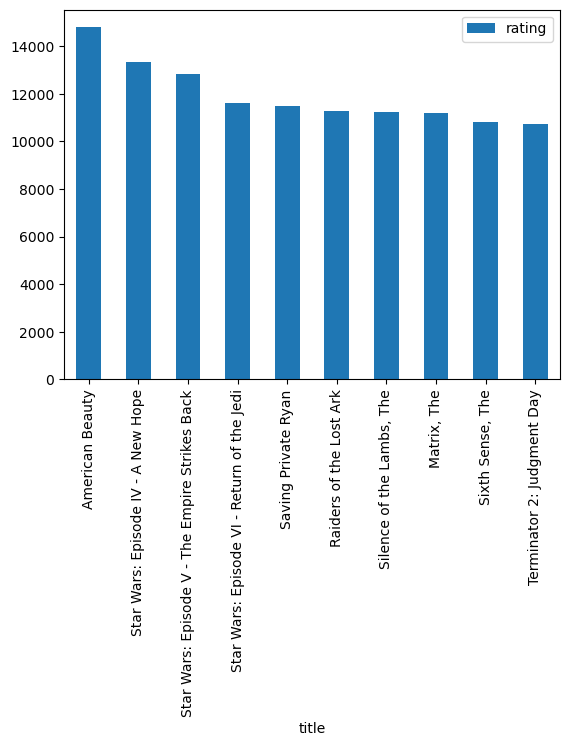

In [64]:
df_rat.sort_values('rating',ascending=False)[0:10].plot(kind='bar')

In [69]:
df_rat.loc['Shawshank Redemption, The']

rating    10143
Name: Shawshank Redemption, The, dtype: int64